In [ ]:
#one way to import env vars
import os
import fredpy as fp
import matplotlib as plt


def set_vars(secrets_file="a.env"):
    with open(f"{secrets_file}", 'r') as file:
        contents = file.read()
        env_vars = contents.replace('export ', '').split("\n")
        fp.api_key = env_vars[0].split("=")[1]
        print(fp.api_key)
set_vars()





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
from fredapi import Fred
%matplotlib nbagg

fp.api_key = fp.load_api_key('cucumber.txt')

def plot_series_fill_between(series_ids):
    # Define start and end dates
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

    # Create empty dataframe to hold data
    df = pd.DataFrame()

    # Iterate through series IDs and add data to dataframe
    for series_id in series_ids:
        fred = Fred(api_key=fp.api_key)
        data = fred.get_series(series_id, start_date=start_date, end_date=end_date)
        df[series_id] = data

    # Create plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_facecolor('lightgray')
    ax.set_title('US Current and Capital Accounts Last 20 Years')

    for series_id in series_ids:
        ax.fill_between(df.index, df[series_id].min(), df[series_id], alpha=0.5)
        ax.plot(df.index, df[series_id], label=series_id)

    ax.legend()
    plt.xlim((0, 20))
    plt.show()

series_ids = ['UNRATE']
plot_series_fill_between(series_ids)


In [ ]:
import fredapi
import matplotlib.pyplot as plt
import pandas as pd
import fredpy as fp
%matplotlib nbagg

fp.api_key = fp.load_api_key('cucumber.txt')
# Set up the FRED API key
fred = fredapi.Fred(api_key=fp.api_key)
# Define the series IDs we want to fetch
series_ids = ['GDPC1', 'GDPDEF', 'UNRATE', 'PAYEMS']

# Fetch the data and create the dataframe
data = {}
for series_id in series_ids:
    data[series_id] = fred.get_series(series_id)
df = pd.DataFrame(data)

# Create the figure and axis for the chart
fig, ax = plt.subplots()
df.plot(ax=ax)

# Set the title and axis labels
ax.set_title('US Economic Indicators')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Show the legend at the bottom
ax.legend(loc='lower center', ncol=len(df.columns))

# Show the chart
plt.show()


In [ ]:
import fredapi
import pandas as pd
from datetime import datetime, timedelta
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')


# Set up the FRED API client
fred = Fred(api_key=fp.api_key)

# Set up the date ranges
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Get the data from FRED
data = fred.get_series('BOPBCA027NBEA', start_date, end_date)

# Convert the data to a dataframe
df = pd.DataFrame(data, columns=['Balance of Payments'])

# Print the dataframe
print(df)


In [ ]:
#Search Series by latest release query
from fredapi import Fred
import fredpy as fp



api_key = fp.load_api_key('cucumber.txt')


# Set up the FRED API client
fred = Fred(api_key=api_key)


# Get list of all series IDs
series_ids = fred.get_series_latest_release("GDP")

# Print first 10 series IDs
print(series_ids[:10])


In [ ]:
from fredapi import Fred
import fredpy as fp
import numpy as np

fp.api_key = fp.load_api_key('cucumber.txt')

# Replace "YOUR_API_KEY" with your actual FRED API key
fred = Fred(api_key=api_key)

# Search for series containing "GDP"
results = fred.search("BOP")

# Print series IDs from search results
for result in results:
    #
    #print(result.rfind('notes'))


In [ ]:
#Test if Series IDs work
import pandas as pd
import requests


base_url = "https://fred.stlouisfed.org/series/"
series_ids = ["GDPC1", "UNRATE", "CPIAUCSL", "PAYEMS", "BOPBCA027NBEA"]

available_series = []

for series_id in series_ids:
    url = base_url + series_id
    response = requests.get(url)
    
    if response.status_code == 200:
        available_series.append(series_id)

df = pd.DataFrame({"Series ID": available_series})

print(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
import numpy as np
%matplotlib nbagg

fp.api_key = fp.load_api_key('cucumber.txt')

def plot_series_fill_between(series_ids):
    # Define start and end dates
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

    # Create empty dataframe to hold data
    df = pd.DataFrame()

    # Iterate through series IDs and add data to dataframe
    for series_id in series_ids:
        try:
            data = fp.series(series_id)
            df[series_id] = data
        except Exception as e:
            print(f"Error fetching data for series ID {series_id}: {str(e)}")

    # Create plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_facecolor('lightgray')
    ax.set_title('US Current and Capital Accounts Last 20 Years')

    for series_id in series_ids:
        if np.isna(df[series_id]).all():
            ax.fill_between(df.index, 0, df[series_id], alpha=0.5)
            ax.plot(df.index, df[series_id], label=series_id)

    ax.legend()
    plt.show()

series_ids = ['NETFI', 'IEABC', 'INVALID']
plot_series_fill_between(series_ids)


In [ ]:
#Simple historical chart
import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
from fredapi import Fred

fp.api_key = fp.load_api_key('cucumber.txt')


# Define the start and end date for the data you want to retrieve
start_date = '2018-01-01'
end_date = '2023-04-01'

# Retrieve the data for the desired series ID
series_id = 'UNRATE'
data = fp.series(series_id, start_date=start_date, end_date=end_date)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=[series_id])

# Plot the data using Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df[series_id], label=series_id)
ax.set_title(f'{series_id} from {start_date} to {end_date}')
ax.legend()
plt.show()


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the FRED website with available series
url = "https://fred.stlouisfed.org/tags/series"

# Send a GET request to the website and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all series links on the page and extract the series IDs
series_links = soup.find_all('a', class_='series-title')
series_ids = [link.get('href').split('/')[-1] for link in series_links]

# Create a DataFrame of the series IDs and save to a CSV file
df = pd.DataFrame({'Series ID': series_ids})
df.to_csv('series_ids.csv', index=False)

# Print the DataFrame to the console
print(df)


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the FRED website with available series
url = "https://fred.stlouisfed.org/tags/series"

# Send a GET request to the website and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all series links on the page and extract the series IDs
series_links = soup.find_all('a', class_='series-title')
series_ids = [link.get('href').split('/')[-1] for link in series_links]

# Create a DataFrame of the series IDs and save to a CSV file
df = pd.DataFrame({'Series ID': series_ids})
df.to_csv('series_ids.csv', index=False)

# Print the DataFrame to the console
print(df)


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the FRED website with available series
url = "https://fred.stlouisfed.org/tags/series"

# Send a GET request to the website and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all series links on the page and extract the series IDs
series_links = soup.find_all('a', class_='series-title')
series_ids = [link.get('href').split('/')[-1] for link in series_links]

# Create a DataFrame of the series IDs and save to a CSV file
df = pd.DataFrame({'Series ID': series_ids})
df.to_csv('series_ids.csv', index=False)

# Print the DataFrame to the console
print(df)



In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the FRED website with available series
url = "https://fred.stlouisfed.org/tags/series"

# Send a GET request to the website and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all series links on the page and extract the series IDs
series_links = soup.find_all('a', class_='series-title')
series_ids = [link.get('href').split('/')[-1] for link in series_links]

# Create a DataFrame of the series IDs and save to a CSV file
df = pd.DataFrame({'Series ID': series_ids})
df.to_csv('series_ids.csv', index=False)

# Print the DataFrame to the console
print(df)



In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the FRED website with available series
url = "https://fred.stlouisfed.org/tags/series"

# Send a GET request to the website and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all series links on the page and extract the series IDs
series_links = soup.find_all('a', class_='series-title')
series_ids = [link.get('href').split('/')[-1] for link in series_links]

# Create a DataFrame of the series IDs and save to a CSV file
df = pd.DataFrame({'Series ID': series_ids})
df.to_csv('series_ids.csv', index=False)

# Print the DataFrame to the console
print(df)


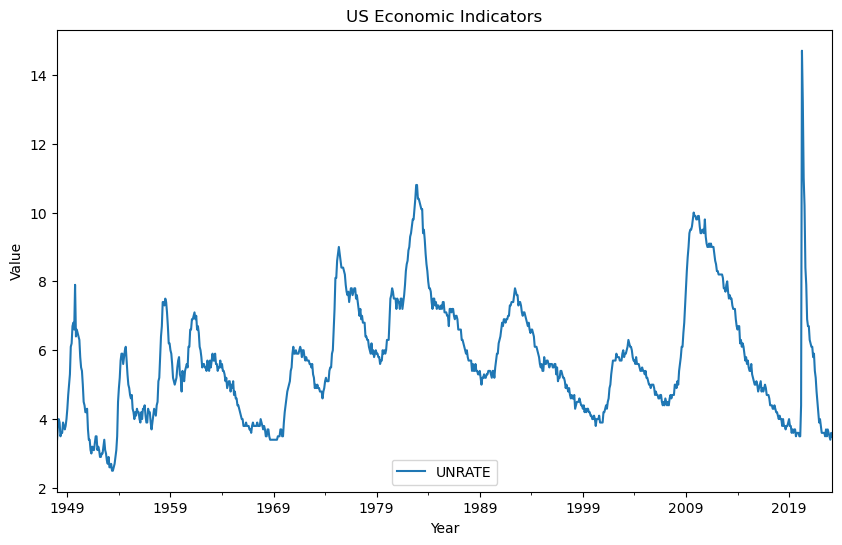

In [1]:
import fredapi
import matplotlib.pyplot as plt
import pandas as pd

# Set up the FRED API key
fp = open('cucumber.txt', 'r')
api_key = fp.read().strip()
fp.close()

# Initialize the FRED API client
fred = fredapi.Fred(api_key=api_key)

# Define the series IDs we want to fetch
series_ids = ['UNRATE']

# Fetch the data and create the dataframe
data = {}
for series_id in series_ids:
    data[series_id] = fred.get_series(series_id)
df = pd.DataFrame(data)

# Set the date column as the index
df.index = pd.to_datetime(df.index)

# Create the figure and axis for the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series on the chart
for col in df.columns:
    df[col].plot(ax=ax, label=col)

# Set the title and axis labels
ax.set_title('US Economic Indicators')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Show the legend at the bottom
ax.legend(loc='lower center', ncol=len(df.columns))

# Show the chart
plt.show()
